# Exploratory data analysis for Springboard Capstone project 1
## UCI Credit Card Dataset (Kaggle.com)
data set containing default data for 30,000 credit card customers in Taiwan from April - September, 2005

## Description of columns
here we will list the names and descriptions for each column of the dataset.

## Description of Columns

ID: ID of each client

LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit

SEX: Gender (1=male, 2=female)

EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)

MARRIAGE: Marital status (1=married, 2=single, 3=others)

AGE: Age in years

PAY_0: Repayment status in September, 2005 
(-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)

PAY_2: Repayment status in August, 2005 (scale same as above)

PAY_3: Repayment status in July, 2005 (scale same as above)

PAY_4: Repayment status in June, 2005 (scale same as above)

PAY_5: Repayment status in May, 2005 (scale same as above)

PAY_6: Repayment status in April, 2005 (scale same as above)

BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)

BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)

BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)

BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)

BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)

BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)

PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)

PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)

PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)

PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)

PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)

PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)

default.payment.next.month: Default payment (1=yes, 0=no)

## Import necessary packages
We will be using pandas, numpy, and scipy for exploratory data analysis.

For visual analysis, we will use matplotlib.pyplot and seaborn.

In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Import dataset and check for consistency

In [183]:
df = pd.read_csv('UCI_Credit_Card.csv')
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
ID                            30000 non-null int64
LIMIT_BAL                     30000 non-null float64
SEX                           30000 non-null int64
EDUCATION                     30000 non-null int64
MARRIAGE                      30000 non-null int64
AGE                           30000 non-null int64
PAY_0                         30000 non-null int64
PAY_2                         30000 non-null int64
PAY_3                         30000 non-null int64
PAY_4                         30000 non-null int64
PAY_5                         30000 non-null int64
PAY_6                         30000 non-null int64
BILL_AMT1                     30000 non-null float64
BILL_AMT2                     30000 non-null float64
BILL_AMT3                     30000 non-null float64
BILL_AMT4                     30000 non-null float64
BILL_AMT5                     30000 non-null float64
BILL_AMT6   

Looks like we aren't missing anything, each column has 30,000 entries and all the data types are either int64 or float 64.

### quick note:
there are some negative bill amounts in the bill columns, here are the counts for all 6 months. these are presumeably wealthy cardholders who have the ability to pay ahead on their credit cards. Let's see how many there are for each month

In [184]:
print('There are', df.loc[df['BILL_AMT1']<0,'ID'].count(), 'negative bills in 9/2005')

print('There are', df.loc[df['BILL_AMT2']<0,'ID'].count(), 'negative bills in 8/2005')

print('There are', df.loc[df['BILL_AMT3']<0,'ID'].count(), 'negative bills in 7/2005')

print('There are', df.loc[df['BILL_AMT4']<0,'ID'].count(), 'negative bills in 6/2005')

print('There are', df.loc[df['BILL_AMT5']<0,'ID'].count(), 'negative bills in 5/2005')

print('There are', df.loc[df['BILL_AMT6']<0,'ID'].count(), 'negative bills in 4/2005')

There are 590 negative bills in 9/2005
There are 669 negative bills in 8/2005
There are 655 negative bills in 7/2005
There are 675 negative bills in 6/2005
There are 655 negative bills in 5/2005
There are 688 negative bills in 4/2005


## Overview of default data
0 = no default
1 = default

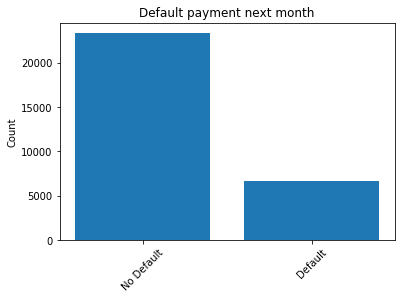

percentage of total defaults
0.2212


,ID
default.payment.next.month,
0,23364
1,6636


In [185]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['default.payment.next.month'].unique()))

#Describe default.payment.next.month
plt.bar(x,df['default.payment.next.month'].value_counts().sort_index())
plt.ylabel('Count')
plt.xticks(x,('No Default','Default'),rotation=45)
plt.title('Default payment next month')
plt.show()

print('percentage of total defaults')
print(df['default.payment.next.month'].mean())
df.groupby(['default.payment.next.month'])[['ID']].count()

## Overview of limit balance

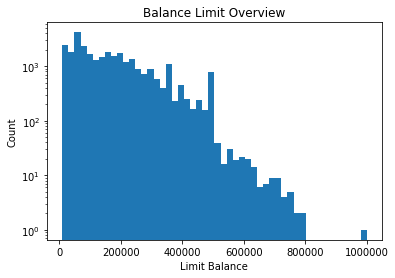

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [186]:
#Describe LIMIT_BAL

#draw a histogram to visually analyze the data
plt.hist(df['LIMIT_BAL'],bins=50)

#set y scale to log to get a better view of the distribution
plt.yscale('log')

#label the axes and add a title
plt.xlabel('Limit Balance')
plt.ylabel('Count')
plt.title('Balance Limit Overview')

#show the historgram
plt.show()

#show a table of the summary statistics
df['LIMIT_BAL'].describe()

## box plot of limit balance grouped by default
0 = no default
1 = default

,mean,std
default.payment.next.month,,
0,178099.726074,131628.359660
1,130109.656420,115378.540571


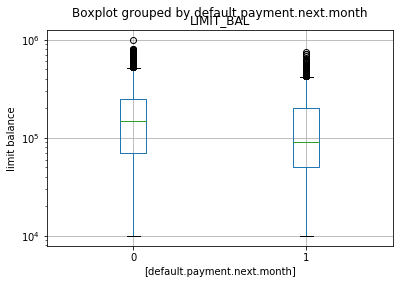

In [187]:
#create a boxplot of limit balance grouped by default with y scale set to log
df.boxplot(column=['LIMIT_BAL'],by = ['default.payment.next.month']).set_yscale('log')

#add y label
plt.ylabel('limit balance')

#show table of summary statistics for this plot
pd.DataFrame(df.groupby(['default.payment.next.month'])['LIMIT_BAL'].describe().loc[:,['mean','std']])

## Statistical Significance of Limit Balance in relation to Default (t-test)

null hypothesis: there is no difference between the mean limit balance between customers who defaulted and did not default, and is not statistically significant.

alternative hypothesis: the mean limit balance between customers who defaulted and did not default is statiscically significant

In [188]:
rvs0 = df[df['default.payment.next.month']==0]['LIMIT_BAL']
rvs1 = df[df['default.payment.next.month']==1]['LIMIT_BAL']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=26.908521684796522, pvalue=1.3022439532597397e-157)

The test statistic shows that the mean limit balance of defualt and the mean limit balance of no default are approximately 27 standard deviations away from each other.
The p-value is very close to 0.

2 distributions are not the same; if we are going for a 95% confidence interval, the p-value < p-critical, so we reject the null hypothesis - the difference is significant.

## Gender overview
1 = male, 2 = female

First, we will change the value of SEX to 0 and 1.

In [189]:
df.SEX.replace({1:0, 2:1}, inplace=True)

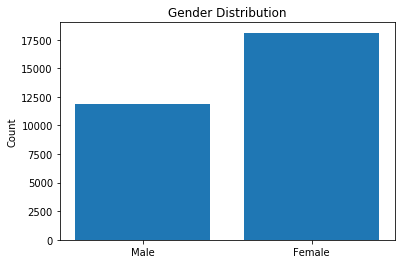

,ID
SEX,
0,11888
1,18112


In [190]:
#set the number of ticks based on the number of different values in the series
x=np.arange(2)

#Describe SEX using a bar plot to count the number of males and females
plt.bar(x,df['SEX'].value_counts().sort_index())

#label the axes and add title
plt.ylabel('Count')
plt.xticks(x,('Male','Female'))
plt.title('Gender Distribution')

#show plot
plt.show()

#show counts of male and female
df.groupby(['SEX'])[['ID']].count()

## Default mean by gender

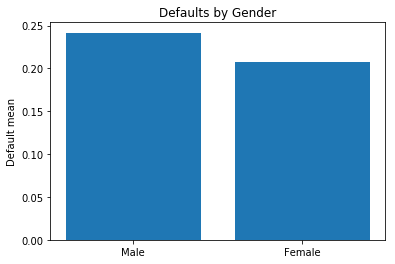

,default.payment.next.month
SEX,
0,0.241672
1,0.207763


In [191]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['SEX'].unique()))

#calculate the default mean for each sex and store in a variable
defaults_by_sex=df.groupby(['SEX'])[['default.payment.next.month']].mean()

#Create the barplot
plt.bar(x,defaults_by_sex['default.payment.next.month'])

#label the axes and add title
plt.ylabel('Default mean')
plt.xticks(x,('Male','Female'))
plt.title('Defaults by Gender')

#show plot
plt.show()

#show mean for each sex
df.groupby(['SEX'])[['default.payment.next.month']].mean()

## Statistical Significance of Gender in relation to Default (Chi Square)

Null hypothesis: the mean default of each gender is statistically insignificant

Alternative hypothesis: the mean deafult of each gender is statistically significant

In [192]:
#create contingency table
pd.crosstab(df['SEX'],df['default.payment.next.month'])

default.payment.next.month,0,1
SEX,,
0,9015,2873
1,14349,3763


In [193]:
#run chi square contingency test on the table above
stats.chi2_contingency(pd.crosstab(df['SEX'],df['default.payment.next.month']))

(47.70879689062111, 4.944678999412044e-12, 1, array([[ 9258.3744,  2629.6256],
        [14105.6256,  4006.3744]]))

test statistic: 47.70879689062111 

p-value: 4.944678999412044e-12

degree of freedom: 1

expected frequencies: 

[ 9258.3744,  2629.6256]

[14105.6256,  4006.3744]
        
##### based on these findings, we reject the null hypothesis and assume that the mean default for each gender is not the same.

## Education overview

Let's take a quick look at the education column to see what the different values are

In [194]:
df.EDUCATION.value_counts().sort_index()

0       14
1    10585
2    14030
3     4917
4      123
5      280
6       51
Name: EDUCATION, dtype: int64

Looks like we have some values in this column that do not fit the description at the top. Additionally, there is no reason to have an 'others column' and 2 additional 'unknown' columns. We will lump all of these values (0, 5, 6) into 4 ('others')

In [195]:
#lump together all unknowns into 'other'
fil = (df.EDUCATION == 5) | (df.EDUCATION == 6) | (df.EDUCATION == 0)
df.loc[fil, 'EDUCATION'] = 4

Now that we've cleaned that up, let's make a bar plot of the value counts

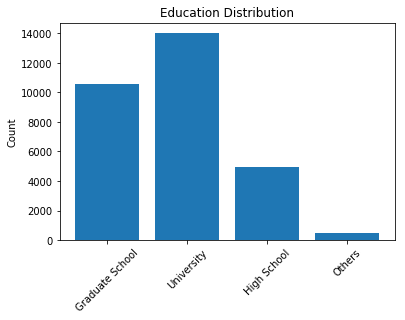

,ID
EDUCATION,
1,10585
2,14030
3,4917
4,468


In [196]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['EDUCATION'].unique()))

#Make bar plot of EDUCATION value counts
plt.bar(x,df['EDUCATION'].value_counts().sort_index())

#label axes and add title
plt.ylabel('Count')
plt.xticks(x,('Graduate School','University','High School','Others','Unknown','Unknown','Unknown'),
          rotation=45)
plt.title('Education Distribution')

#show plot
plt.show()

#show value counts
df.groupby(['EDUCATION'])[['ID']].count()

## Default mean by education

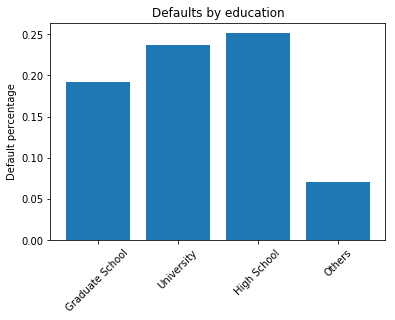

,default.payment.next.month
EDUCATION,
1,0.192348
2,0.237349
3,0.251576
4,0.070513


In [197]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['EDUCATION'].unique()))

#count the number of defaults for each level of education and store in a variable
defaults_by_education=df.groupby(['EDUCATION'])[['default.payment.next.month']].mean()

#Make bar plot of default mean for each class of education
plt.bar(x,defaults_by_education['default.payment.next.month'])

#label axes and add title
plt.ylabel('Default percentage')
plt.xticks(x,('Graduate School','University','High School','Others'),rotation=45)
plt.title('Defaults by education')

#show plot
plt.show()

#show mean for each class of education
df.groupby(['EDUCATION'])[['default.payment.next.month']].mean()

## Statistical Significance of Educaiton in relation to Default (Chi Square)

Null hypothesis: The mean default is not different between the different levels of education

Alternative hypothesis: The mean default is different between the different levels of education

In [198]:
#display contingency table for education & default
pd.crosstab(df['EDUCATION'],df['default.payment.next.month'])

default.payment.next.month,0,1
EDUCATION,,
1,8549,2036
2,10700,3330
3,3680,1237
4,435,33


In [199]:
#run chi square test on contingency table
stats.chi2_contingency(pd.crosstab(df['EDUCATION'],df['default.payment.next.month']))

(160.40995107224546,
 1.4950645648106153e-34,
 3,
 array([[ 8243.598 ,  2341.402 ],
        [10926.564 ,  3103.436 ],
        [ 3829.3596,  1087.6404],
        [  364.4784,   103.5216]]))

since our p-value is close to zero, we reject the null hypothesis and assume that difference in education is significant when predicting the probability of default.

## Marriage distribution

Let's take a quick look at the marriage column to see what the different values are

In [200]:
df['MARRIAGE'].value_counts().sort_index()

0       54
1    13659
2    15964
3      323
Name: MARRIAGE, dtype: int64

Once again it looks like we a value in this column that does not fit the description at the top (0). We will replace all of the 0's with 3's ('other')

In [201]:
#lump together all unknowns into 'other'
fil = (df.MARRIAGE == 0)
df.loc[fil, 'MARRIAGE'] = 3

Now that we've cleaned that up, let's make a bar plot of the value counts

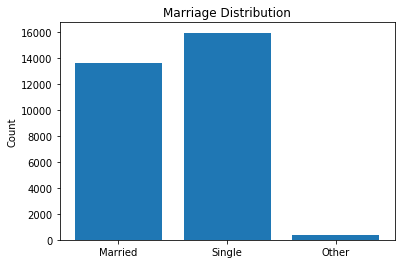

,ID
MARRIAGE,
1,13659
2,15964
3,377


In [202]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['MARRIAGE'].unique()))

#Make barplot of marriage value counts
plt.bar(x,df['MARRIAGE'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Married','Single','Other'))
plt.title('Marriage Distribution')

#show plot
plt.show()

#display counts of each marriage category
df.groupby(['MARRIAGE'])[['ID']].count()

## Default mean by marriage

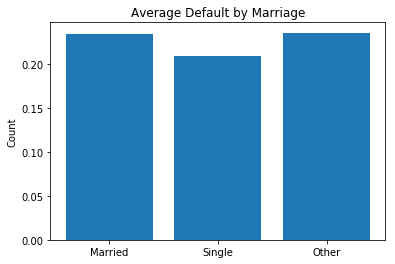

,default.payment.next.month
MARRIAGE,
1,0.234717
2,0.209283
3,0.236074


In [203]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['MARRIAGE'].unique()))

#count the number of defaults for each level of education and store in a variable
average_defaults_by_marriage=df.groupby(['MARRIAGE'])[['default.payment.next.month']].mean()

#make barplot of default mean by marriage
plt.bar(x,average_defaults_by_marriage['default.payment.next.month'])

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Married','Single','Other'))
plt.title('Average Default by Marriage')

#show plot
plt.show()

#display default mean for each value of marriage
df.groupby(['MARRIAGE'])[['default.payment.next.month']].mean()

## Statistical Significance of Marriage in relation to Default (Chi Square)

Null hypothesis: there is no difference between marriage and default

Alternative hypothesis: there is a difference between marriage and default

In [204]:
#create contingency table for chi square test
pd.crosstab(df['MARRIAGE'],df['default.payment.next.month'])

default.payment.next.month,0,1
MARRIAGE,,
1,10453,3206
2,12623,3341
3,288,89


In [205]:
#run chi square test on contingency table
stats.chi2_contingency(pd.crosstab(df['MARRIAGE'],df['default.payment.next.month']))

(28.13032464482199, 7.790720364202813e-07, 2, array([[10637.6292,  3021.3708],
        [12432.7632,  3531.2368],
        [  293.6076,    83.3924]]))

Based on the chi squared test results, the difference between the default percentage of married/unmarried is significant. Although the difference in the histogram is small, because of the large sample size it is still significant.

## Age distribution

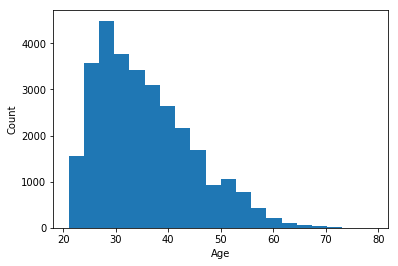

count    30000.000000
mean        35.485500
std          9.217904
min         21.000000
25%         28.000000
50%         34.000000
75%         41.000000
max         79.000000
Name: AGE, dtype: float64

In [206]:
#Make historgram of age
plt.hist(df['AGE'], bins = 20)

#add labels and title
plt.xlabel('Age')
plt.ylabel('Count')

#show plot
plt.show()

#show summary statistics for age
df['AGE'].describe()

## Boxplot of age grouped by default

,mean,std
default.payment.next.month,,
0,35.417266,9.077355
1,35.725738,9.693438


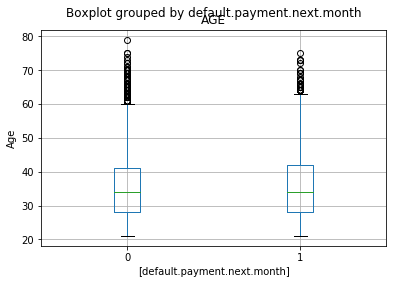

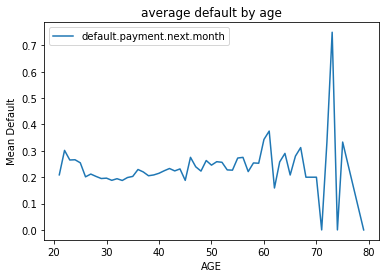

In [207]:
#make a box plot of default by age
df.boxplot(column=['AGE'],by = ['default.payment.next.month'])
plt.ylabel('Age')

#plot mean default by age
default_by_age=pd.DataFrame(df.groupby(['AGE'])['default.payment.next.month'].mean())
default_by_age.plot(title='average default by age')
plt.ylabel('Mean Default')

#display mean and standard deviation of age by default
pd.DataFrame(df.groupby(['default.payment.next.month'])['AGE'].describe().loc[:,['mean','std']])

It appears that the default rate is higher for customers under 25, generally lower around 30, and then starts to increase at about 35, then drops again after 60 (with some obvious outliers). 

Due to the limited sample size for customers over 55 it is difficult to get a realistic idea of the default rate for this age group.

## Statistical significance of Age in relation to Default (t-test)

Null hypothesis: mean default is the same regardless of age

Alternative hypothesis: mean default is not the same for all ages

we will use the t-test because the age variable is relatively normally distributed.

In [208]:
rvs0 = df[df['default.payment.next.month']==0]['AGE']
rvs1 = df[df['default.payment.next.month']==1]['AGE']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=-2.40594177499625, pvalue=0.016136845890163835)

Based on this result, we will accept the null hypothesis and assume that age does not affect the chance of default.

## Repayment status September, 2005

Let's take a quick look at the values for this column to see what if they match the discription

In [209]:
df['PAY_0'].value_counts().sort_index()

-2     2759
-1     5686
 0    14737
 1     3688
 2     2667
 3      322
 4       76
 5       26
 6       11
 7        9
 8       19
Name: PAY_0, dtype: int64

Once again it looks like we values in this column that do not fit the description at the top (0, -2). We will replace all of the negative values with 0 ('pay duly').

In [210]:
#lump together all negative values into 'pay duly'
fil = (df.PAY_0 == -2) | (df.PAY_0 == -1)
df.loc[fil, 'PAY_0'] = 0

Now that we've cleaned that up, let's take a look at the value counts for this column

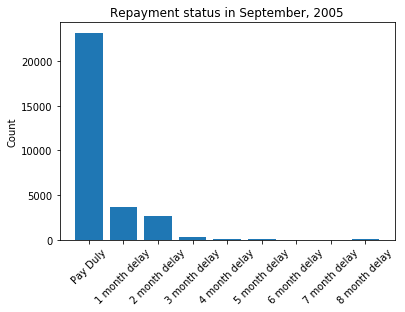

,ID
PAY_0,
0,23182
1,3688
2,2667
3,322
4,76
5,26
6,11
7,9
8,19


In [211]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_0'].unique()))

#make bar plot of 9/2005 repayment status value counts
plt.bar(x,df['PAY_0'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Repayment status in September, 2005')

#show plot
plt.show()

#display counts for each category
df.groupby(['PAY_0'])[['ID']].count()

## Default mean by repayment status September, 2005

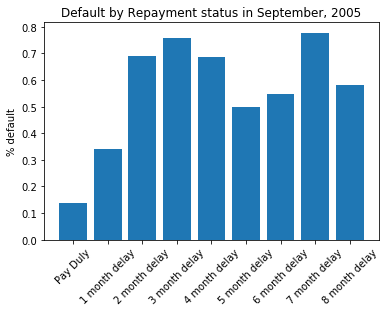

,default.payment.next.month
PAY_0,
0,0.138340
1,0.339479
2,0.691414
3,0.757764
4,0.684211
5,0.500000
6,0.545455
7,0.777778
8,0.578947


In [212]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_0'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status=df.groupby(['PAY_0'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 9/2005
plt.bar(x,defaults_by_pay_status['default.payment.next.month'])

#add labels and title
plt.ylabel('% default')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Default by Repayment status in September, 2005')

#show plot
plt.show()

#display mean for each value count
df.groupby(['PAY_0'])[['default.payment.next.month']].mean()

## Bill amount in September, 2005

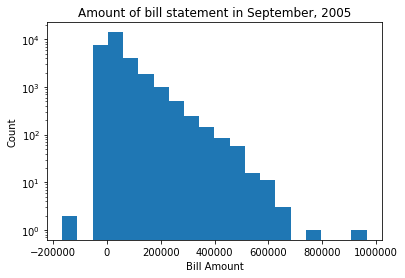

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64


In [213]:
#make histogram of bill amounts for 9/2005
plt.hist(df['BILL_AMT1'],bins=20)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of bill statement in September, 2005')

#show plot
plt.show()

#display summary statistics
print(df['BILL_AMT1'].describe())

## Box plot of bill amount by default September, 2005

,mean,std
default.payment.next.month,,
0,51994.227273,73577.606694
1,48509.162297,73782.067220


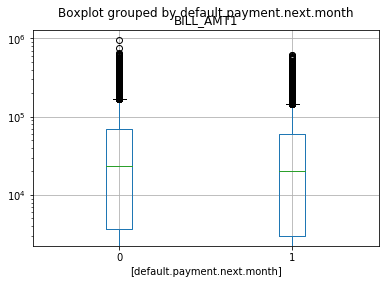

In [214]:
#make a box plot of default by bill amount 9/2005, set y scale to log for visual clarity
df.boxplot(column=['BILL_AMT1'],by = ['default.payment.next.month']).set_yscale('log')

#display mean and standard deviation of bill amount for default and no default
pd.DataFrame(df.groupby(['default.payment.next.month'])['BILL_AMT1'].describe().loc[:,['mean','std']])

## Statistical significance of bill amount in relation to default for September, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [215]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['BILL_AMT1']
rvs1 = df[df['default.payment.next.month']==1]['BILL_AMT1']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=3.403018001170964, pvalue=0.0006673295491221741)

Since our p-value is less than 0.01, we will reject the null hypothesis and assume that the bill amount for September, 2005 is significant in predicting the chance of default.

## Previous month payment amount September, 2005

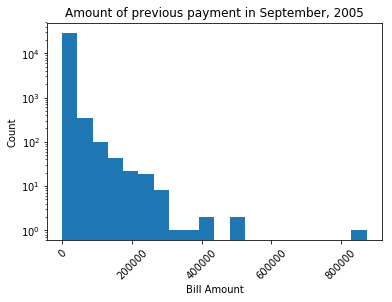

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64


In [216]:
#create histogram for previous month payment amount 9/2005
plt.hist(df['PAY_AMT1'],bins=20)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of previous payment in September, 2005')
plt.xticks(rotation=45)

#show plot
plt.show()

#show summary statistics
print(df['PAY_AMT1'].describe())

## Default by previous month pay amount September, 2005

,mean,std
default.payment.next.month,,
0,6307.337357,18014.508990
1,3397.044153,9544.252427


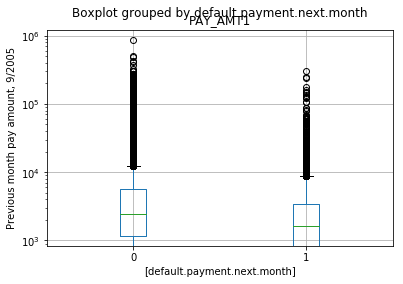

In [217]:
#make a box plot of default by previous month payment amount 9/2005 with y scale set to log
df.boxplot(column=['PAY_AMT1'],by = ['default.payment.next.month']).set_yscale('log')

#label y axis
plt.ylabel('Previous month pay amount, 9/2005')

#display mean and standard deviation of no default and default for previous month pay amount 9/2005
pd.DataFrame(df.groupby(['default.payment.next.month'])['PAY_AMT1'].describe().loc[:,['mean','std']])

## Statistical significance of previous month pay amount in relation to default for September, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [218]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['PAY_AMT1']
rvs1 = df[df['default.payment.next.month']==1]['PAY_AMT1']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=12.665062557364722, pvalue=1.1464876142241624e-36)

Since our p-value is less than 0.01, we will reject the null hypothesis and assume that the amount paid in August, 2005 is significant in predicting the chance of default.

## Repayment status August, 2005

Let's take a quick look at the values for this column to see what if they match the discription

In [219]:
df['PAY_2'].value_counts().sort_index()

-2     3782
-1     6050
 0    15730
 1       28
 2     3927
 3      326
 4       99
 5       25
 6       12
 7       20
 8        1
Name: PAY_2, dtype: int64

Once again it looks like we values in this column that do not fit the description at the top (0, -2). We will replace all of the negative values with 0 ('pay duly').

In [220]:
#lump together all negative values into 'pay duly'
fil = (df.PAY_2 == -2) | (df.PAY_2 == -1)
df.loc[fil, 'PAY_2'] = 0

Now that we've cleaned that up, let's take a look at the value counts for this column

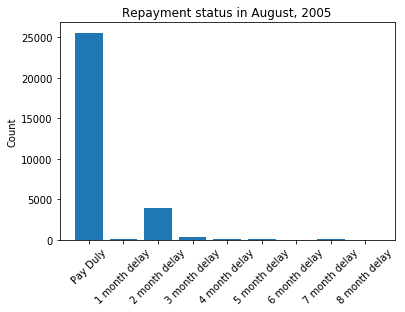

,ID
PAY_2,
0,25562
1,28
2,3927
3,326
4,99
5,25
6,12
7,20
8,1


In [221]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_2'].unique()))

#make bar plot of 8/2005 repayment status value counts
plt.bar(x,df['PAY_2'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Repayment status in August, 2005')

#show plot
plt.show()

#display counts for each category
df.groupby(['PAY_2'])[['ID']].count()

## Default mean by repayment status August, 2005

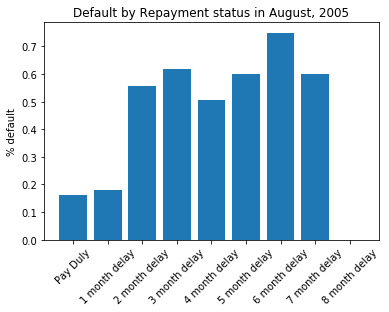

,default.payment.next.month
PAY_2,
0,0.162742
1,0.178571
2,0.556150
3,0.616564
4,0.505051
5,0.600000
6,0.750000
7,0.600000
8,0.000000


In [222]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_2'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status=df.groupby(['PAY_2'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 8/2005
plt.bar(x,defaults_by_pay_status['default.payment.next.month'])

#add labels and title
plt.ylabel('% default')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Default by Repayment status in August, 2005')

#show plot
plt.show()

#display mean for each value count
df.groupby(['PAY_2'])[['default.payment.next.month']].mean()

## Bill amount in August, 2005

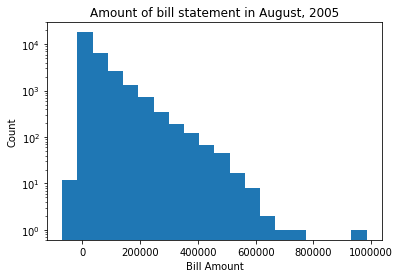

count     30000.000000
mean      49179.075167
std       71173.768783
min      -69777.000000
25%        2984.750000
50%       21200.000000
75%       64006.250000
max      983931.000000
Name: BILL_AMT2, dtype: float64


In [223]:
#make histogram of bill amounts for 8/2005
plt.hist(df['BILL_AMT2'],bins=20)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of bill statement in August, 2005')

#show plot
plt.show()

#display summary statistics
print(df['BILL_AMT2'].describe())

## Box plot of bill amount by default August, 2005

,mean,std
default.payment.next.month,,
0,49717.435670,71029.946709
1,47283.617842,71651.030364


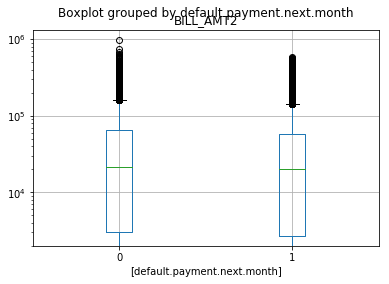

In [224]:
#make a box plot of default by bill amount 8/2005, set y scale to log for visual clarity
df.boxplot(column=['BILL_AMT2'],by = ['default.payment.next.month']).set_yscale('log')

#display mean and standard deviation of bill amount for default and no default
pd.DataFrame(df.groupby(['default.payment.next.month'])['BILL_AMT2'].describe().loc[:,['mean','std']])

## Statistical significance of bill amount in relation to default for August, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [225]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['BILL_AMT2']
rvs1 = df[df['default.payment.next.month']==1]['BILL_AMT2']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=2.458503181278919, pvalue=0.013957362392434761)

Since our p-value is greater than 0.01, we will accept the null hypothesis and assume that the bill amount for August, 2005 is not significant in predicting the chance of default.

## Previous month payment amount August, 2005

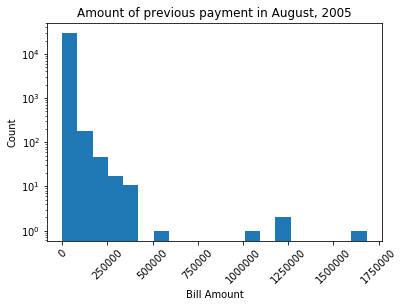

count    3.000000e+04
mean     5.921163e+03
std      2.304087e+04
min      0.000000e+00
25%      8.330000e+02
50%      2.009000e+03
75%      5.000000e+03
max      1.684259e+06
Name: PAY_AMT2, dtype: float64


In [226]:
#create histogram for previous month payment amount 8/2005
plt.hist(df['PAY_AMT2'],bins=20)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of previous payment in August, 2005')
plt.xticks(rotation=45)

#show plot
plt.show()

#show summary statistics
print(df['PAY_AMT2'].describe())

## Default by previous month pay amount August, 2005

,mean,std
default.payment.next.month,,
0,6640.465074,25302.263601
1,3388.649638,11737.986064


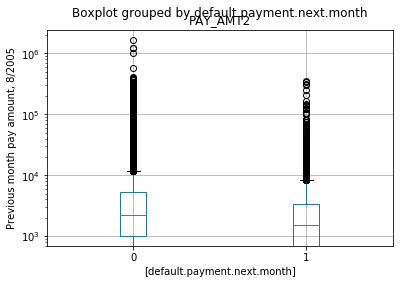

In [227]:
#make a box plot of default by previous month payment amount 8/2005 with y scale set to log
df.boxplot(column=['PAY_AMT2'],by = ['default.payment.next.month']).set_yscale('log')

#label y axis
plt.ylabel('Previous month pay amount, 8/2005')

#display mean and standard deviation of no default and default for previous month pay amount 8/2005
pd.DataFrame(df.groupby(['default.payment.next.month'])['PAY_AMT2'].describe().loc[:,['mean','std']])

## Statistical significance of previous month pay amount in relation to default for August, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [228]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['PAY_AMT2']
rvs1 = df[df['default.payment.next.month']==1]['PAY_AMT2']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=10.163243786034139, pvalue=3.1666567628387115e-24)

Since our p-value is less than 0.01, we will reject the null hypothesis and assume that the amount paid in July, 2005 is significant in predicting the chance of default.

## Repayment status July, 2005

Let's take a quick look at the values for this column to see what if they match the discription

In [229]:
df['PAY_3'].value_counts().sort_index()

-2     4085
-1     5938
 0    15764
 1        4
 2     3819
 3      240
 4       76
 5       21
 6       23
 7       27
 8        3
Name: PAY_3, dtype: int64

Once again it looks like we values in this column that do not fit the description at the top (0, -2). We will replace all of the negative values with 0 ('pay duly').

In [230]:
#lump together all negative values into 'pay duly'
fil = (df.PAY_3 == -2) | (df.PAY_3 == -1)
df.loc[fil, 'PAY_3'] = 0

Now that we've cleaned that up, let's take a look at the value counts for this column

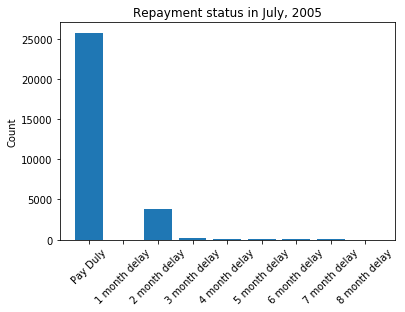

,ID
PAY_3,
0,25787
1,4
2,3819
3,240
4,76
5,21
6,23
7,27
8,3


In [231]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_3'].unique()))

#make bar plot of 7/2005 repayment status value counts
plt.bar(x,df['PAY_3'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Repayment status in July, 2005')

#show plot
plt.show()

#display counts for each category
df.groupby(['PAY_3'])[['ID']].count()

## Default mean by repayment status July, 2005

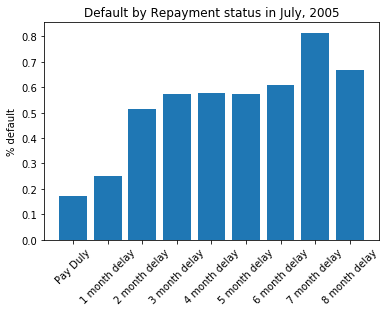

,default.payment.next.month
PAY_3,
0,0.171947
1,0.250000
2,0.515580
3,0.575000
4,0.578947
5,0.571429
6,0.608696
7,0.814815
8,0.666667


In [232]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_3'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status=df.groupby(['PAY_3'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 7/2005
plt.bar(x,defaults_by_pay_status['default.payment.next.month'])

#add labels and title
plt.ylabel('% default')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Default by Repayment status in July, 2005')

#show plot
plt.show()

#display mean for each value count
df.groupby(['PAY_3'])[['default.payment.next.month']].mean()

## Bill amount in July, 2005

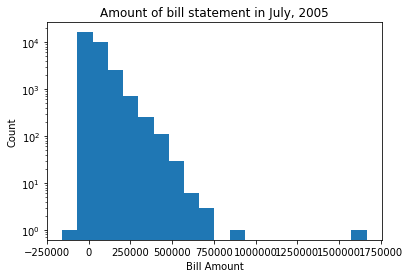

count     30000.000000
mean      51223.330900
std       73635.860576
min     -165580.000000
25%        3558.750000
50%       22381.500000
75%       67091.000000
max      964511.000000
Name: BILL_AMT1, dtype: float64


In [233]:
#make histogram of bill amounts for 7/2005
plt.hist(df['BILL_AMT3'],bins=20)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of bill statement in July, 2005')

#show plot
plt.show()

#display summary statistics
print(df['BILL_AMT1'].describe())

## Box plot of bill amount by default

,mean,std
default.payment.next.month,,
0,51994.227273,73577.606694
1,48509.162297,73782.067220


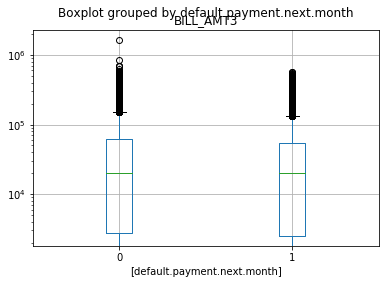

In [234]:
#make a box plot of default by bill amount 7/2005, set y scale to log for visual clarity
df.boxplot(column=['BILL_AMT3'],by = ['default.payment.next.month']).set_yscale('log')

#display mean and standard deviation of bill amount for default and no default
pd.DataFrame(df.groupby(['default.payment.next.month'])['BILL_AMT1'].describe().loc[:,['mean','std']])

## Statistical significance of bill amount in relation to default for July, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [235]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['BILL_AMT3']
rvs1 = df[df['default.payment.next.month']==1]['BILL_AMT3']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=2.4381115045173596, pvalue=0.014769982710723002)

Since our p-value is greater than 0.01, we will accept the null hypothesis and assume that the bill amount for July, 2005 is significant in predicting the chance of default.

## Previous month payment amount July, 2005

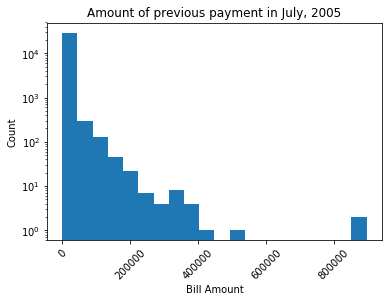

count     30000.000000
mean       5663.580500
std       16563.280354
min           0.000000
25%        1000.000000
50%        2100.000000
75%        5006.000000
max      873552.000000
Name: PAY_AMT1, dtype: float64


In [236]:
#create histogram for previous month payment amount 7/2005
plt.hist(df['PAY_AMT3'],bins=20)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of previous payment in July, 2005')
plt.xticks(rotation=45)

#show plot
plt.show()

#show summary statistics
print(df['PAY_AMT1'].describe())

## Default by previous month pay amount July, 2005

,mean,std
default.payment.next.month,,
0,5753.496833,18684.255937
1,3367.351567,12959.624486


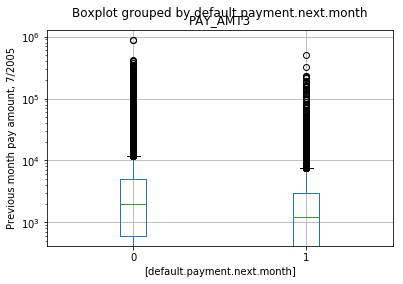

In [237]:
#make a box plot of default by previous month payment amount 7/2005 with y scale set to log
df.boxplot(column=['PAY_AMT3'],by = ['default.payment.next.month']).set_yscale('log')

#label y axis
plt.ylabel('Previous month pay amount, 7/2005')

#display mean and standard deviation of no default and default for previous month pay amount 7/2005
pd.DataFrame(df.groupby(['default.payment.next.month'])['PAY_AMT3'].describe().loc[:,['mean','std']])

## Statistical significance of previous month pay amount in relation to default for July, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [238]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['PAY_AMT3']
rvs1 = df[df['default.payment.next.month']==1]['PAY_AMT3']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=9.757971658572275, pvalue=1.841770291503132e-22)

Since our p-value is less than 0.01, we will reject the null hypothesis and assume that the amount paid in June, 2005 is significant in predicting the chance of default.

## Repayment status June, 2005

Let's take a quick look at the values for this column to see what if they match the discription

In [239]:
df['PAY_4'].value_counts().sort_index()

-2     4348
-1     5687
 0    16455
 1        2
 2     3159
 3      180
 4       69
 5       35
 6        5
 7       58
 8        2
Name: PAY_4, dtype: int64

Once again it looks like we values in this column that do not fit the description at the top (0, -2). We will replace all of the negative values with 0 ('pay duly').

In [240]:
#lump together all negative values into 'pay duly'
fil = (df.PAY_4 == -2) | (df.PAY_4 == -1)
df.loc[fil, 'PAY_4'] = 0

Now that we've cleaned that up, let's take a look at the value counts for this column

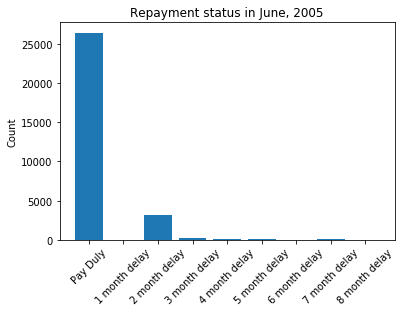

,ID
PAY_4,
0,26490
1,2
2,3159
3,180
4,69
5,35
6,5
7,58
8,2


In [241]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_4'].unique()))

#make bar plot of 6/2005 repayment status value counts
plt.bar(x,df['PAY_4'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Repayment status in June, 2005')

#show plot
plt.show()

#display counts for each category
df.groupby(['PAY_4'])[['ID']].count()

## Default mean by repayment status June, 2005

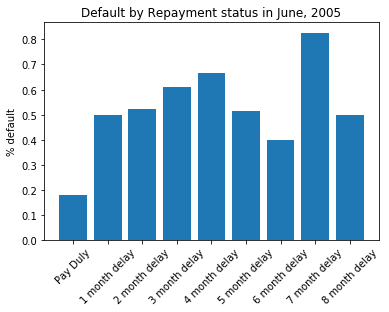

,default.payment.next.month
PAY_4,
0,0.179577
1,0.500000
2,0.523267
3,0.611111
4,0.666667
5,0.514286
6,0.400000
7,0.827586
8,0.500000


In [242]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_4'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status=df.groupby(['PAY_4'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 6/2005
plt.bar(x,defaults_by_pay_status['default.payment.next.month'])

#add labels and title
plt.ylabel('% default')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Default by Repayment status in June, 2005')

#show plot
plt.show()

#display mean for each value count
df.groupby(['PAY_4'])[['default.payment.next.month']].mean()

## Bill amount in June, 2005

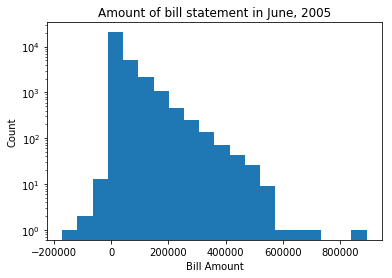

count     30000.000000
mean      43262.948967
std       64332.856134
min     -170000.000000
25%        2326.750000
50%       19052.000000
75%       54506.000000
max      891586.000000
Name: BILL_AMT4, dtype: float64


In [243]:
#make histogram of bill amounts for 6/2005
plt.hist(df['BILL_AMT4'],bins=20)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of bill statement in June, 2005')

#show plot
plt.show()

#display summary statistics
print(df['BILL_AMT4'].describe())

## Box plot of bill amount by default June, 2005

,mean,std
default.payment.next.month,,
0,43611.165254,64324.796730
1,42036.950573,64351.076092


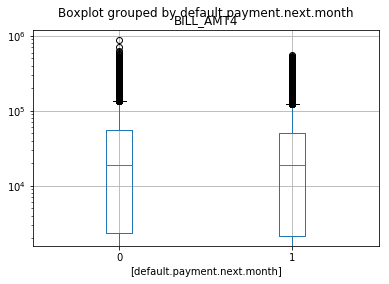

In [244]:
#make a box plot of default by bill amount 6/2005, set y scale to log for visual clarity
df.boxplot(column=['BILL_AMT4'],by = ['default.payment.next.month']).set_yscale('log')

#display mean and standard deviation of bill amount for default and no default
pd.DataFrame(df.groupby(['default.payment.next.month'])['BILL_AMT4'].describe().loc[:,['mean','std']])

## Statistical significance of bill amount in relation to default for June, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [245]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['BILL_AMT4']
rvs1 = df[df['default.payment.next.month']==1]['BILL_AMT4']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=1.759188785998342, pvalue=0.07855564157651403)

Since our p-value is greater than 0.01, we will accept the null hypothesis and assume that the bill amount for August, 2005 is not significant in predicting the chance of default.

## Previous month payment amount June, 2005

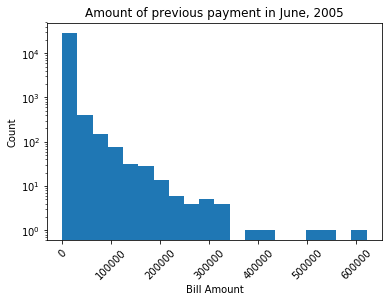

count     30000.000000
mean       4826.076867
std       15666.159744
min           0.000000
25%         296.000000
50%        1500.000000
75%        4013.250000
max      621000.000000
Name: PAY_AMT4, dtype: float64


In [246]:
#create histogram for previous month payment amount 6/2005
plt.hist(df['PAY_AMT4'],bins=20)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of previous payment in June, 2005')
plt.xticks(rotation=45)

#show plot
plt.show()

#show summary statistics
print(df['PAY_AMT4'].describe())

## Default by previous month pay amount June, 2005

,mean,std
default.payment.next.month,,
0,5300.529319,16689.778060
1,3155.626733,11191.973162


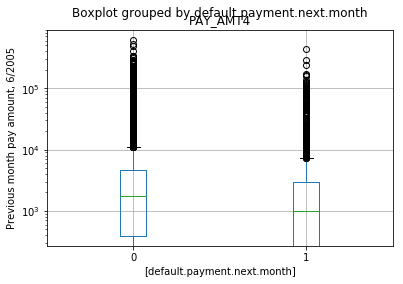

In [247]:
#make a box plot of default by previous month payment amount 6/2005 with y scale set to log
df.boxplot(column=['PAY_AMT4'],by = ['default.payment.next.month']).set_yscale('log')

#label y axis
plt.ylabel('Previous month pay amount, 6/2005')

#display mean and standard deviation of no default and default for previous month pay amount 6/2005
pd.DataFrame(df.groupby(['default.payment.next.month'])['PAY_AMT4'].describe().loc[:,['mean','std']])

## Statistical significance of previous month pay amount in relation to default for June, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [248]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['PAY_AMT4']
rvs1 = df[df['default.payment.next.month']==1]['PAY_AMT4']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=9.858397459473979, pvalue=6.830941601370003e-23)

Since our p-value is less than 0.01, we will reject the null hypothesis and assume that the amount paid in May, 2005 is significant in predicting the chance of default.

## Repayment status May, 2005

Let's take a quick look at the values for this column to see what if they match the discription

In [249]:
df['PAY_5'].value_counts().sort_index()

-2     4546
-1     5539
 0    16947
 2     2626
 3      178
 4       84
 5       17
 6        4
 7       58
 8        1
Name: PAY_5, dtype: int64

Once again it looks like we values in this column that do not fit the description at the top (0, -2). We will replace all of the negative values with 0 ('pay duly').

In [250]:
#lump together all negative values into 'pay duly'
fil = (df.PAY_5 == -2) | (df.PAY_5 == -1)
df.loc[fil, 'PAY_5'] = 0

Now that we've cleaned that up, let's take a look at the value counts for this column

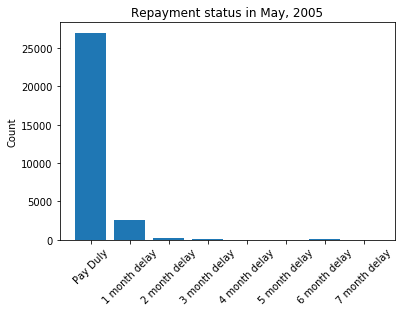

,ID
PAY_5,
0,27032
2,2626
3,178
4,84
5,17
6,4
7,58
8,1


In [251]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_5'].unique()))

#make bar plot of 5/2005 repayment status value counts
plt.bar(x,df['PAY_5'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Repayment status in May, 2005')

#show plot
plt.show()

#display counts for each category
df.groupby(['PAY_5'])[['ID']].count()

## Default mean by repayment status May, 2005

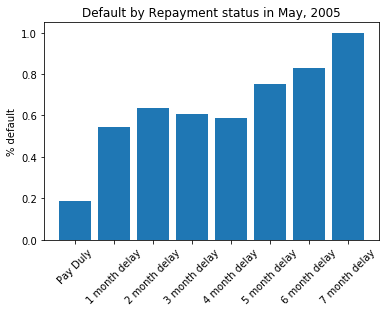

,default.payment.next.month
PAY_5,
0,0.184485
2,0.541889
3,0.634831
4,0.607143
5,0.588235
6,0.750000
7,0.827586
8,1.000000


In [252]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_5'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status=df.groupby(['PAY_5'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 5/2005
plt.bar(x,defaults_by_pay_status['default.payment.next.month'])

#add labels and title
plt.ylabel('% default')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Default by Repayment status in May, 2005')

#show plot
plt.show()

#display mean for each value count
df.groupby(['PAY_5'])[['default.payment.next.month']].mean()

## Bill amount in May, 2005

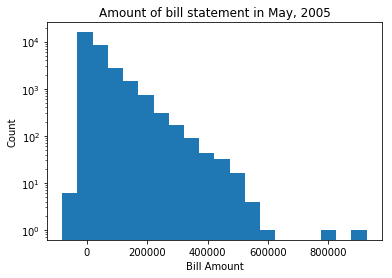

count     30000.000000
mean      40311.400967
std       60797.155770
min      -81334.000000
25%        1763.000000
50%       18104.500000
75%       50190.500000
max      927171.000000
Name: BILL_AMT5, dtype: float64


In [253]:
#make histogram of bill amounts for 5/2005
plt.hist(df['BILL_AMT5'],bins=20)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of bill statement in May, 2005')

#show plot
plt.show()

#display summary statistics
print(df['BILL_AMT5'].describe())

## Box plot of bill amount by default May, 2005

,mean,std
default.payment.next.month,,
0,40530.445343,60617.268112
1,39540.190476,61424.695949


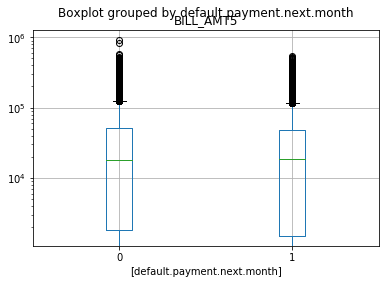

In [254]:
#make a box plot of default by bill amount 5/2005, set y scale to log for visual clarity
df.boxplot(column=['BILL_AMT5'],by = ['default.payment.next.month']).set_yscale('log')

#display mean and standard deviation of bill amount for default and no default
pd.DataFrame(df.groupby(['default.payment.next.month'])['BILL_AMT5'].describe().loc[:,['mean','std']])

## Statistical significance of bill amount in relation to default for May, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [255]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['BILL_AMT5']
rvs1 = df[df['default.payment.next.month']==1]['BILL_AMT5']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=1.1709344117538458, pvalue=0.24163444291382874)

Since our p-value is greater than 0.01, we will accept the null hypothesis and assume that the bill amount for August, 2005 is not significant in predicting the chance of default.

## Previous month payment amount May, 2005

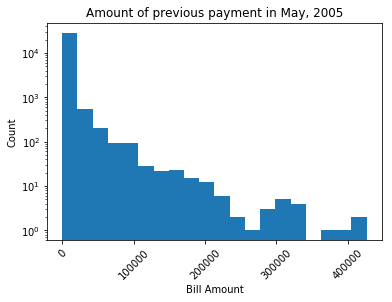

count     30000.000000
mean       4799.387633
std       15278.305679
min           0.000000
25%         252.500000
50%        1500.000000
75%        4031.500000
max      426529.000000
Name: PAY_AMT5, dtype: float64


In [256]:
#create histogram for previous month payment amount 5/2005
plt.hist(df['PAY_AMT5'],bins=20)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of previous payment in May, 2005')
plt.xticks(rotation=45)

#show plot
plt.show()

#show summary statistics
print(df['PAY_AMT5'].describe())

## Default by previous month pay amount May, 2005

,mean,std
default.payment.next.month,,
0,5248.220296,16071.667860
1,3219.139542,11944.731175


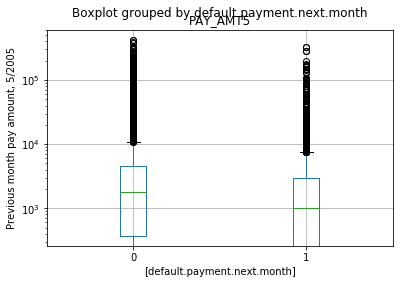

In [257]:
#make a box plot of default by previous month payment amount 5/2005 with y scale set to log
df.boxplot(column=['PAY_AMT5'],by = ['default.payment.next.month']).set_yscale('log')

#label y axis
plt.ylabel('Previous month pay amount, 5/2005')

#display mean and standard deviation of no default and default for previous month pay amount 5/2005
pd.DataFrame(df.groupby(['default.payment.next.month'])['PAY_AMT5'].describe().loc[:,['mean','std']])

## Statistical significance of previous month pay amount in relation to default for May, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [258]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['PAY_AMT5']
rvs1 = df[df['default.payment.next.month']==1]['PAY_AMT5']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=9.561893159941787, pvalue=1.2413447727776169e-21)

Since our p-value is less than 0.01, we will reject the null hypothesis and assume that the amount paid in July, 2005 is significant in predicting the chance of default.

## Repayment status April, 2005

Let's take a quick look at the values for this column to see what if they match the discription

In [259]:
df['PAY_6'].value_counts().sort_index()

-2     4895
-1     5740
 0    16286
 2     2766
 3      184
 4       49
 5       13
 6       19
 7       46
 8        2
Name: PAY_6, dtype: int64

Once again it looks like we values in this column that do not fit the description at the top (0, -2). We will replace all of the negative values with 0 ('pay duly').

In [260]:
#lump together all negative values into 'pay duly'
fil = (df.PAY_6 == -2) | (df.PAY_6 == -1)
df.loc[fil, 'PAY_6'] = 0

Now that we've cleaned that up, let's take a look at the value counts for this column

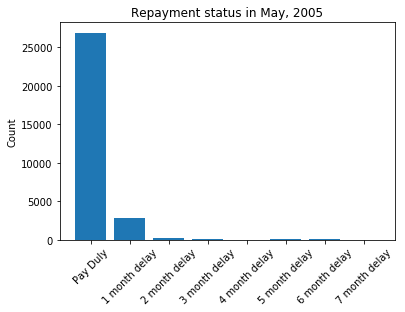

,ID
PAY_6,
0,26921
2,2766
3,184
4,49
5,13
6,19
7,46
8,2


In [261]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_6'].unique()))

#make bar plot of 4/2005 repayment status value counts
plt.bar(x,df['PAY_6'].value_counts().sort_index())

#add labels and title
plt.ylabel('Count')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Repayment status in May, 2005')

#show plot
plt.show()

#display counts for each category
df.groupby(['PAY_6'])[['ID']].count()

## Default mean by repayment status April, 2005

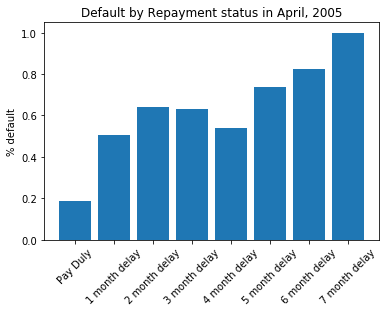

,default.payment.next.month
PAY_6,
0,0.186657
2,0.506508
3,0.641304
4,0.632653
5,0.538462
6,0.736842
7,0.826087
8,1.000000


In [262]:
#set the number of ticks based on the number of different values in the series
x=np.arange(len(df['PAY_6'].unique()))

#find percentage of defaults for each repayment status and store in a variable
defaults_by_pay_status=df.groupby(['PAY_6'])[['default.payment.next.month']].mean()

#make bar plot of default mean of each value count of repayment status for 4/2005
plt.bar(x,defaults_by_pay_status['default.payment.next.month'])

#add labels and title
plt.ylabel('% default')
plt.xticks(x,('Pay Duly','1 month delay','2 month delay','3 month delay','4 month delay',
             '5 month delay','6 month delay','7 month delay','8 month delay','9+ month delay'),
             rotation=45)
plt.title('Default by Repayment status in April, 2005')

#show plot
plt.show()

#display mean for each value count
df.groupby(['PAY_6'])[['default.payment.next.month']].mean()

## Bill amount in April, 2005

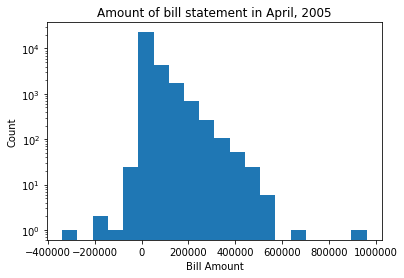

count     30000.000000
mean      38871.760400
std       59554.107537
min     -339603.000000
25%        1256.000000
50%       17071.000000
75%       49198.250000
max      961664.000000
Name: BILL_AMT6, dtype: float64


In [263]:
#make histogram of bill amounts for 4/2005
plt.hist(df['BILL_AMT6'],bins=20)

#set y scale to log to better display values
plt.yscale('log')

#add lables and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of bill statement in April, 2005')

#show plot
plt.show()

#display summary statistics
print(df['BILL_AMT6'].describe())

## Box plot of bill amount by default April, 2005

,mean,std
default.payment.next.month,,
0,39042.268704,59547.015717
1,38271.435503,59579.674268


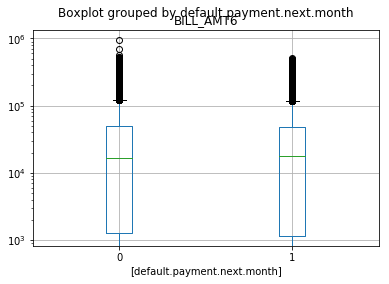

In [264]:
#make a box plot of default by bill amount 4/2005, set y scale to log for visual clarity
df.boxplot(column=['BILL_AMT6'],by = ['default.payment.next.month']).set_yscale('log')

#display mean and standard deviation of bill amount for default and no default
pd.DataFrame(df.groupby(['default.payment.next.month'])['BILL_AMT6'].describe().loc[:,['mean','std']])

## Statistical significance of bill amount in relation to default for April, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [265]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['BILL_AMT6']
rvs1 = df[df['default.payment.next.month']==1]['BILL_AMT6']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=0.9304946490374802, pvalue=0.3521225212306479)

Since our p-value is greater than 0.01, we will accept the null hypothesis and assume that the bill amount for August, 2005 is not significant in predicting the chance of default.

## Previous month payment amount April, 2005

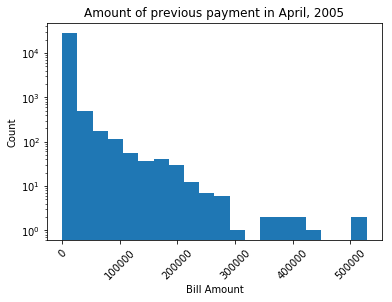

count     30000.000000
mean       5215.502567
std       17777.465775
min           0.000000
25%         117.750000
50%        1500.000000
75%        4000.000000
max      528666.000000
Name: PAY_AMT6, dtype: float64


In [266]:
#create histogram for previous month payment amount 4/2005
plt.hist(df['PAY_AMT6'],bins=20)

#set y scale to log for visual clarity
plt.yscale('log')

#add labels and title
plt.xlabel('Bill Amount')
plt.ylabel('Count')
plt.title('Amount of previous payment in April, 2005')
plt.xticks(rotation=45)

#show plot
plt.show()

#show summary statistics
print(df['PAY_AMT6'].describe())

## Default by previous month pay amount April, 2005

,mean,std
default.payment.next.month,,
0,5719.371769,18792.950473
1,3441.482068,13464.005894


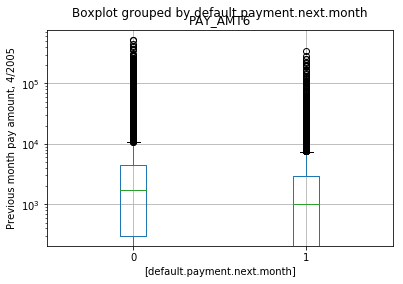

In [267]:
#make a box plot of default by previous month payment amount 4/2005 with y scale set to log
df.boxplot(column=['PAY_AMT6'],by = ['default.payment.next.month']).set_yscale('log')

#label y axis
plt.ylabel('Previous month pay amount, 4/2005')

#display mean and standard deviation of no default and default for previous month pay amount 4/2005
pd.DataFrame(df.groupby(['default.payment.next.month'])['PAY_AMT6'].describe().loc[:,['mean','std']])

## Statistical significance of previous month pay amount in relation to default for April, 2005

Null hypothesis: chance of default is independent of bill amount

Alternative hypothesis: chance of default is not independent of bill amount

In [268]:
#set 2 variables for no default (0) and default (1)
rvs0 = df[df['default.payment.next.month']==0]['PAY_AMT6']
rvs1 = df[df['default.payment.next.month']==1]['PAY_AMT6']

stats.ttest_ind(rvs0,rvs1)

Ttest_indResult(statistic=9.224372354111592, pvalue=3.033589072770243e-20)

Since our p-value is less than 0.01, we will reject the null hypothesis and assume that the amount paid in March, 2005 is significant in predicting the chance of default.

# Preparing for our machine learning model

Now that we've completed our preliminary exploratory data analysis, we will break our categorical variables (gender, marriage, education, and repayment status) into separate columns for each value in the column in order to facilitate the creation of a correlation table (using seaborn's heatmap function), as well as running logit regression using statsmodels.api.

In [269]:
#import packages
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

Before we get started creating the dummy variables, let's consolidate the values of the repayment columns from having 0 to 9 month delay to 0 to 4. 

In [270]:
#Repayment status, 9/2005
fil = (df.PAY_0 == 5) | (df.PAY_0 == 6) | (df.PAY_0 == 7) | (df.PAY_0 == 8) | (df.PAY_0 == 9)
df.loc[fil, 'PAY_0'] = 4

#Repayment status, 8/2005
fil = (df.PAY_2 == 5) | (df.PAY_2 == 6) | (df.PAY_2 == 7) | (df.PAY_2 == 8) | (df.PAY_2 == 9)
df.loc[fil, 'PAY_2'] = 4

#Repayment status, 7/2005
fil = (df.PAY_3 == 5) | (df.PAY_3 == 6) | (df.PAY_3 == 7) | (df.PAY_3 == 8) | (df.PAY_3 == 9)
df.loc[fil, 'PAY_3'] = 4

#Repayment status, 6/2005
fil = (df.PAY_4 == 5) | (df.PAY_4 == 6) | (df.PAY_4 == 7) | (df.PAY_4 == 8) | (df.PAY_4 == 9)
df.loc[fil, 'PAY_4'] = 4

#Repayment status, 5/2005
fil = (df.PAY_5 == 5) | (df.PAY_5 == 6) | (df.PAY_5 == 7) | (df.PAY_5 == 8) | (df.PAY_5 == 9)
df.loc[fil, 'PAY_5'] = 4

#Repayment status, 4/2005
fil = (df.PAY_6 == 5) | (df.PAY_6 == 6) | (df.PAY_6 == 7) | (df.PAY_6 == 8) | (df.PAY_6 == 9)
df.loc[fil, 'PAY_6'] = 4

Now let's check to make sure we got what we wanted

In [271]:
print(df.PAY_0.value_counts().sort_index())
print(df.PAY_2.value_counts().sort_index())
print(df.PAY_3.value_counts().sort_index())
print(df.PAY_4.value_counts().sort_index())
print(df.PAY_5.value_counts().sort_index())
print(df.PAY_6.value_counts().sort_index())

0    23182
1     3688
2     2667
3      322
4      141
Name: PAY_0, dtype: int64
0    25562
1       28
2     3927
3      326
4      157
Name: PAY_2, dtype: int64
0    25787
1        4
2     3819
3      240
4      150
Name: PAY_3, dtype: int64
0    26490
1        2
2     3159
3      180
4      169
Name: PAY_4, dtype: int64
0    27032
2     2626
3      178
4      164
Name: PAY_5, dtype: int64
0    26921
2     2766
3      184
4      129
Name: PAY_6, dtype: int64


Note that in both April and May there are no values corresponding to 1 month delay

## Split categorical columns into dummy variable columns using pandas

In [272]:
#set intercept column (for logit regrssion)
df['intercept'] = 1

#create dummy variable columns for categorical variables
df[['MARRIED','SINGLE','OTHER']] =  pd.get_dummies(df['MARRIAGE'])
df[['GRADUATE_SCHOOL','UNIVERSITY','HIGH_SCHOOL','OTHERS']] =  pd.get_dummies(df['EDUCATION'])
df[['SEP_PAY_DULY','SEP_PAY_DEL_1','SEP_PAY_DEL_2',
    'SEP_PAY_DEL_3','SEP_PAY_DEL_4']] =  pd.get_dummies(df['PAY_0'])
df[['AUG_PAY_DULY','AUG_PAY_DEL_1','AUG_PAY_DEL_2',
    'AUG_PAY_DEL_3','AUG_PAY_DEL_4']] =  pd.get_dummies(df['PAY_2'])
df[['JUL_PAY_DULY','JUL_PAY_DEL_1','JUL_PAY_DEL_2',
    'JUL_PAY_DEL_3','JUL_PAY_DEL_4']] =  pd.get_dummies(df['PAY_3'])
df[['JUN_PAY_DULY','JUN_PAY_DEL_1','JUN_PAY_DEL_2',
    'JUN_PAY_DEL_3','JUN_PAY_DEL_4']] =  pd.get_dummies(df['PAY_4'])
df[['MAY_PAY_DULY','MAY_PAY_DEL_2','MAY_PAY_DEL_3',
    'MAY_PAY_DEL_4']] =  pd.get_dummies(df['PAY_5'])
df[['APR_PAY_DULY','APR_PAY_DEL_2','APR_PAY_DEL_3',
    'APR_PAY_DEL_4']] =  pd.get_dummies(df['PAY_6'])

Let's take a look at our columns now.

In [273]:
print(df.columns)

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month', 'intercept', 'MARRIED', 'SINGLE', 'OTHER',
       'GRADUATE_SCHOOL', 'UNIVERSITY', 'HIGH_SCHOOL', 'OTHERS',
       'SEP_PAY_DULY', 'SEP_PAY_DEL_1', 'SEP_PAY_DEL_2', 'SEP_PAY_DEL_3',
       'SEP_PAY_DEL_4', 'AUG_PAY_DULY', 'AUG_PAY_DEL_1', 'AUG_PAY_DEL_2',
       'AUG_PAY_DEL_3', 'AUG_PAY_DEL_4', 'JUL_PAY_DULY', 'JUL_PAY_DEL_1',
       'JUL_PAY_DEL_2', 'JUL_PAY_DEL_3', 'JUL_PAY_DEL_4', 'JUN_PAY_DULY',
       'JUN_PAY_DEL_1', 'JUN_PAY_DEL_2', 'JUN_PAY_DEL_3', 'JUN_PAY_DEL_4',
       'MAY_PAY_DULY', 'MAY_PAY_DEL_2', 'MAY_PAY_DEL_3', 'MAY_PAY_DEL_4',
       'APR_PAY_DULY', 'APR_PAY_DEL_2', 'APR_PAY_DEL_3', 'APR_PAY_DEL_4'],
      dtype='object')


although some of the values in the middle have been cut out, we can see that our categorical columns now have their dummy variable counterparts. 

## Correlation table
Using Seaborn, we're going to create a correlation table for our dummy variables

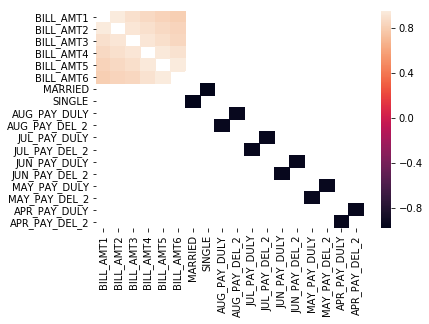

In [292]:
#remove categorical columns from dataset for heatmap
heatmap_data = df.drop(['ID','EDUCATION','MARRIAGE','PAY_0','PAY_2',
                        'PAY_3','PAY_4','PAY_5','PAY_6','intercept'], axis = 1)

#create covariance matrix
heatmap_correlation = heatmap_data.corr()

#create filter to view which columns are highly correlated
#we also have to filter out the diagonal where all values are 1
fil = (abs(heatmap_correlation) > 0.8) & (heatmap_correlation !=1)

#filter the correlation matrix
fil = heatmap_correlation[fil]

#drop rows with all NaN values (correlation < 0.8)
fil = fil.dropna(how = 'all')

#drop columns with all NaN values
fil = fil.dropna(how = 'all', axis = 1)

#generate heatmap
sns.heatmap(fil)

#show plot
plt.show()

just to make sure we're not missing any highly correlated features, let's look at the correlation where it's equal to 1.

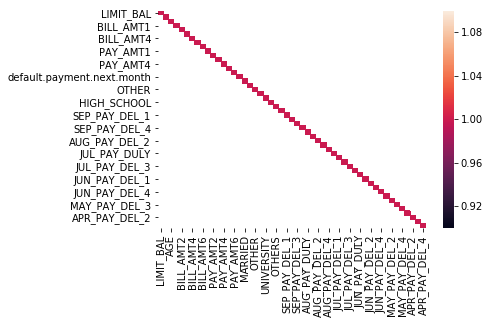

In [296]:
#filter values = 1
fil = heatmap_correlation == 1

#filter correlation matrix
fil = heatmap_correlation[fil]

#generate plot
sns.heatmap(fil)

#show plot
plt.show()

Doesn't look like we lost any information by filtering out the values in our table = 1.

## Insights from the correlation heatmap

-The bill amount columns have a high correlation to each other. When we ran the statistical signifigance tests, the bill amount columns were not significant in predicting default. This makes sense because people who have a lot of money would be likely to have a high bill and be able to pay it off every month, where someone who has bad spending habits could also have a high bill but end up defaulting. <b>We will not include these columns for our machine learning model.</b>

-The pay duly and pay delay 2 columns also have a high negative correlation; however, this is expected as a given customer could only be in 1 of those columns at a time. Since we converted the pay status columns from a categorical column to dummy variables, this makes sense. Pay status is also the strongest indicator of default in our set of features. We will include these columns in the machine learning model. The other pay status columns are not included because their value counts are very small compared to 'pay duly' and 'pay del 2', so their correlation is not as strong. It is worth considering lumping all of the pay status columns into 0 = 'pay duly' and 1 = 'pay del'.

-The only other columns included in the filtered heatmap are married and single, which were again dummy variable columns created from a categorical column. These will also be included in our model

Let's also take a look at the correlation for each column against default in our unfiltered correlation matrix

In [290]:
heatmap_correlation.loc['default.payment.next.month']

LIMIT_BAL                    -0.153520
SEX                          -0.039961
AGE                           0.013890
BILL_AMT1                    -0.019644
BILL_AMT2                    -0.014193
BILL_AMT3                    -0.014076
BILL_AMT4                    -0.010156
BILL_AMT5                    -0.006760
BILL_AMT6                    -0.005372
PAY_AMT1                     -0.072929
PAY_AMT2                     -0.058579
PAY_AMT3                     -0.056250
PAY_AMT4                     -0.056827
PAY_AMT5                     -0.055124
PAY_AMT6                     -0.053183
default.payment.next.month    1.000000
MARRIED                       0.029775
SINGLE                       -0.030619
OTHER                         0.004043
GRADUATE_SCHOOL              -0.051328
UNIVERSITY                    0.036467
HIGH_SCHOOL                   0.032403
OTHERS                       -0.045703
SEP_PAY_DULY                 -0.368117
SEP_PAY_DEL_1                 0.106690
SEP_PAY_DEL_2            

This is interesting - obviously the pay duly correlation has a strong negative correlation; however, the 2 month delay columns have a much higher correlation for default than any of the others. Perhaps this is due to the low sample size for the payment delay for 3 & 4+? In addition, most of the correlation to default is relatively low (< ~0.33). This is likely due to the fact that our data set is unbalanced and only 23% of the customers defaulted.

## Logit regression for Marriage

In [282]:
logit = sm.Logit(df['default.payment.next.month'], df[['intercept','MARRIED','SINGLE']])
result = logit.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.527954
         Iterations 5


<class 'statsmodels.iolib.summary.Summary'>
"""
                               Logit Regression Results                               
======================================================================================
Dep. Variable:     default.payment.next.month   No. Observations:                30000
Model:                                  Logit   Df Residuals:                    29997
Method:                                   MLE   Df Model:                            2
Date:                        Sat, 29 Dec 2018   Pseudo R-squ.:               0.0008861
Time:                                09:42:08   Log-Likelihood:                -15839.
converged:                               True   LL-Null:                       -15853.
                                                LLR p-value:                 7.938e-07
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.1743      0.121     -9.683      0.000      -1.412      -0.937
MARRIED       -0.0075      0.123     -0.061      0.951      -0.249       0.233
SINGLE        -0.1549      0.123     -1.261      0.207      -0.396       0.086
==============================================================================
"""

Running Logit regression just to try it out, seems like a useful method, easier to use than the standard statistical tests since you can print a nice summary tables with a simple call to .summary()

## Split dataframe into testing/training sets

In [295]:
#set dependent variable to default.payment.next.month
y = df['default.payment.next.month'].copy()

#set independent varaible to remaining columns (features)
features = ['LIMIT_BAL', 'SEX', 'GRADUATE_SCHOOL','UNIVERSITY','HIGH_SCHOOL',
            'OTHERS', 'MARRIED','SINGLE','OTHER', 'AGE', 'SEP_PAY_DULY','SEP_PAY_DEL_1',
            'SEP_PAY_DEL_2','SEP_PAY_DEL_3','SEP_PAY_DEL_4', 'AUG_PAY_DULY','AUG_PAY_DEL_1',
            'AUG_PAY_DEL_2','AUG_PAY_DEL_3','AUG_PAY_DEL_4', 'JUL_PAY_DULY','JUL_PAY_DEL_1',
            'JUL_PAY_DEL_2','JUL_PAY_DEL_3','JUL_PAY_DEL_4', 'JUN_PAY_DULY','JUN_PAY_DEL_1',
            'JUN_PAY_DEL_2','JUN_PAY_DEL_3','JUN_PAY_DEL_4', 'MAY_PAY_DULY','MAY_PAY_DEL_2',
            'MAY_PAY_DEL_3','MAY_PAY_DEL_4', 'APR_PAY_DULY','APR_PAY_DEL_2','APR_PAY_DEL_3',
            'APR_PAY_DEL_4','PAY_AMT1','PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5',
            'PAY_AMT6']

X = df[features].copy()

#split the dataset into testing and training using train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Let's test to make sure that our testing and training sets have relatively similar default percentages compared to the whole set.

In [333]:
print('Training set mean:', np.mean(y_train))
print('Testing set mean:', np.mean(y_test))

Training set mean: 0.22179166666666666
Testing set mean: 0.21883333333333332


This seems pretty reasonable, since our orignal percentage was about 23%.

## Selecting a machine learning model

Since we are trying to predict default based on the features of our data set, this is a classification problem. Classification machine learning models to consider are:

Nearest Neighbors, Decision Trees, Gaussian Process, Naive Bayes, or Random Forests, AdaBoost, Gradient Tree Boosting, and Neural Network Models

### Nearest Neighbors

For our dataset, the nearest neighbors model may not be the best choice due to the high dimensionality of our dataset. Since our data is not uniformly sampled (only about 23% of our dataset contains defaults), we would want to use RadiusNeighborsClassifier; however, because of the large number of features, this model would suffer from the 'curse of dimensionality'.

### Decision Trees

This could be a good model, but we may have better results from an ensemble method such as random forests. 

<b>Advantages</b>

-it is easy to implement; easy to test validity of the model 

-can handle both categorical and numerical data 

-easily visualize and interpret results



<b>Disadvantages</b>

-can easily result in overfitting on the training set, leading to inacurate results in the testing data

-can result in biased results due to unbalanced data set (can be mitigated using ensemble method)

### Gaussian Process

Gaussian process models are a generic supervised learning method which can be used for classification problems.

<b>Advantages</b>

-the prediction is probabilistic, so results can be interpreted with a confidence interval to decide whether to refit the model

-supports custom kernels

<b>Disadvantages</b>

-lose efficiency in high dimensional spaces (features > ~24)

### Naive Bayes

Naive Bayes models apply Bayes' theorum with the assumption that each feature is independent. 

<b>Advantages</b>

-require small amount of training data

-faster than more complex models

-good classifier

<b>Disadvantages</b>

-bad estimator (probabilities not accurate)

### Random Forests

Random forests creates decision trees using bootstrap sampling on the training set. As a result of the randomness of this model, the bias usually increases compared to a single decision tree; however, because of averaging, the variance decreases, which makes up for the increase in bias. This could be a good model for our data set.

### AdaBoost

AdaBoost uses a sequence of weak learners on repeatedly modified versions of the data. The results are then combined through a weighted majority vote. This method could be also be a good model for our data set.

### Gradient Tree Boosting

Gradient tree boosting uses several weak decision trees built sequentially to improve the overall accuracy of the model by combining the weak models to reduce bias. This model can handle mixed data types and handles outliers well; however, it does not scale well and cannot be parallelized. 

### Neural Network

The multi-layer perceptron model can learn a non-linear function approximator for either classification or regression. It takes a set of features (neurons) as input, passes these into 'hidden layers' which transform the values of the previous layer with weighted linear summation and then passes those values to a non-linear activation function. 

<b>Advantages</b>

-ability to learn non-linear models

-able to learn models in real time (online learning).

<b>Disadvantages</b>

-Sensitive to feature scaling

-different random weight initializations can lead to different validation accuracy

-requires tuning of different hyperparameters (number of hidden neurons, layers, and iterations)


While this model is powerful, it may not be the best choice for this project since we will not be doing real time learning.

## Test run of decision trees

Let's try out the decision trees model and see what we get with and without the class_weight parameter.

In [334]:
#import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, f1_score, balanced_accuracy_score

In [325]:
#set model parameters
clf = DecisionTreeClassifier(max_depth = 3, class_weight = 'balanced')

#fit model
clf = clf.fit(X_train, y_train)

#run prediction
prd = clf.predict(X_test)

#check accuracy
print('accuracy:', accuracy_score(y_true = y_test, y_pred = prd))

#check precision
print('precision:', precision_score(y_true = y_test, y_pred = prd))

#check f1_score
print('f1_score:', f1_score(y_true = y_test, y_pred = prd))

accuracy: 0.7608333333333334
precision: 0.4618272841051314
f1_score: 0.5070422535211268


Not the results I was hoping for. How can we imporve upon this? Let's try increasing the max_depth. Maybe 3 is too small?

In [336]:
#set model parameters
clf = DecisionTreeClassifier(max_depth =4 , class_weight = 'balanced')

#fit model
clf = clf.fit(X_train, y_train)

#run prediction
prd = clf.predict(X_test)

#check accuracy
print('max_depth = 4')

print('accuracy:', accuracy_score(y_true = y_test, y_pred = prd))

#check precision
print('precision:', precision_score(y_true = y_test, y_pred = prd))

#check f1_score
print('f1_score:', f1_score(y_true = y_test, y_pred = prd))

#check balanced accuracy score
print('balanced accuracy score', balanced_accuracy_score(y_true = y_test, y_pred = prd))

#set model parameters
clf = DecisionTreeClassifier(max_depth =5 , class_weight = 'balanced')

#fit model
clf = clf.fit(X_train, y_train)

#run prediction
prd = clf.predict(X_test)

#check accuracy
print('max_depth = 5')

print('accuracy:', accuracy_score(y_true = y_test, y_pred = prd))

#check precision
print('precision:', precision_score(y_true = y_test, y_pred = prd))

#check f1_score
print('f1_score:', f1_score(y_true = y_test, y_pred = prd))

#check balanced accuracy score
print('balanced accuracy score', balanced_accuracy_score(y_true = y_test, y_pred = prd))

#set model parameters with max_depth = 6
clf = DecisionTreeClassifier(max_depth =6 , class_weight = 'balanced')

#fit model
clf = clf.fit(X_train, y_train)

#run prediction
prd = clf.predict(X_test)

#check accuracy

print('max_depth = 6')

print('accuracy:', accuracy_score(y_true = y_test, y_pred = prd))

#check precision
print('precision:', precision_score(y_true = y_test, y_pred = prd))

#check f1_score
print('f1_score:', f1_score(y_true = y_test, y_pred = prd))

#check balanced accuracy score
print('balanced accuracy score', balanced_accuracy_score(y_true = y_test, y_pred = prd))

#set model parameters with max_depth = 7
clf = DecisionTreeClassifier(max_depth =7 , class_weight = 'balanced')

#fit model
clf = clf.fit(X_train, y_train)

#run prediction
prd = clf.predict(X_test)

#check accuracy

print('max_depth = 7')

print('accuracy:', accuracy_score(y_true = y_test, y_pred = prd))

#check precision
print('precision:', precision_score(y_true = y_test, y_pred = prd))

#check f1_score
print('f1_score:', f1_score(y_true = y_test, y_pred = prd))

#check balanced accuracy score
print('balanced accuracy score', balanced_accuracy_score(y_true = y_test, y_pred = prd))

max_depth = 4
accuracy: 0.777
precision: 0.4917163684559311
f1_score: 0.52586817859674
balanced accuracy score 0.7007369641134404
max_depth = 5
accuracy: 0.7778333333333334
precision: 0.49331550802139035
f1_score: 0.5254538981844072
balanced accuracy score 0.7001738372783628
max_depth = 6
accuracy: 0.7341666666666666
precision: 0.42586750788643535
f1_score: 0.5038880248833593
balanced accuracy score 0.6919614964565501
max_depth = 7
accuracy: 0.7415
precision: 0.43410852713178294
f1_score: 0.5027252324462969
balanced accuracy score 0.6895279695536145


It would appear that a max_depth of 5 gives the highest precision and accuracy, but has a lower f1 score than 4. What happens if we remove the class_weight = balanced prarameter?

In [335]:
#set model parameters
clf = DecisionTreeClassifier(max_depth =5)

#fit model
clf = clf.fit(X_train, y_train)

#run prediction
prd = clf.predict(X_test)

#check accuracy
print('max_depth = 5')

print('accuracy:', accuracy_score(y_true = y_test, y_pred = prd))

#check precision
print('precision:', precision_score(y_true = y_test, y_pred = prd))

#check f1_score
print('f1_score:', f1_score(y_true = y_test, y_pred = prd))

#check balanced accuracy score
print('balanced accuracy score', balanced_accuracy_score(y_true = y_test, y_pred = prd))

max_depth = 5
accuracy: 0.8208333333333333
precision: 0.6819571865443425
f1_score: 0.4534824605998983
balanced accuracy score 0.6476510274322635


Well, this is interesting. Now our model is quite a bit more accurate and precise, but both the f1 score and the balanced accuracy score decreased significantly. This is a good chance to discuss the different metrics for measuring our model.

## Scikit Learn Metrics

There are several different metric functions for classification in the scikit learn package. Let's start with some simple ones.

<b>Accuracy Score</b>: Returns the fraction of correctly classified samples <i>[y_pred / y_true]</i>. 

<b>Precision Score</b>: Returns the ratio of true positives divided by the sum of true positives and false positives <i>[tp / (tp + fp)]</i>.

<b>Recall Score</b>: Returns the ratio of true positives divided by the sum of the true positives plus the false negatives, which can be interpreted as the ability of the model to find all the positive samples <i>[tp / (tp + fn)]</i>.

<b>F1 Score</b>: Returns the weighted average of precision and recall <i>[2 * (precision * recall) / (precision + recall)]</i>.

<b>Balanced Accuracy Score</b>: Returns the balanced accuracy, defined as the average of recall for each class. 

Let's take a look at the confusion matrix for our model

In [342]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(y_true = y_test, y_pred = prd))

,0,1
0,3665,1022
1,529,784


Since our model is binary (defualt/no default), the confusion matrix can be inerpreted as follows:

(0,0): True negatives

(1,0): False negatives

(1,1): True positives

(0,1): False positives

Seems like we have a lot of false positives (classified as default but actually not). 

Just out of curiousity, let's see what the default percentage of our model's prediction is...

In [343]:
print(np.mean(prd))

0.301


hmmm...30% is quite a bit higher than the real average. Anyway, let's move on to a different model.